# Which One of The Online Streaming Services Should I Subscribe?
### Comparison Analysis of Amazon Prime, Disney Plus, HBO Max, Hulu, Netflix

* The dataset is gained through scraping the contents on reelgood.com from July, 20, 2020 to July 21, 2020
    * Information Collected: Title, Service Name, Content Type, Year, Number of Seasons, IMDB Score, Reelgood Score, Film Rate, Genre <br>
    * 27,305 Movies and TV Series in total
<br><br>
* Motivation
    * There are 200+ Streaming Services including Netflix, HBO Max, Hulu etc. 
    * It is hard to access the content catalogue from the websites without subscription
<br><br>
* Objective
    * Compare the contents (movies and TV series) from 5 major streaming services (Netflix, Amazon Prime, Hulu, Disney plus, HBO Max)
    * Help the audience understand which streaming service is the best fit for them
<br><br>
* Target Audience
     * People low on budget looking for one streaming service to subscribe
<br><br>
* Questions of Interest
Q. Which service has the most contents?<br>
Q. How does the distribution of the imdb scores look for each service?<br>
Q. How many high quality movies and TV series are there for each service?<br>
Q. Is there a trend in the count of high-quality contents?<br>
Q. What are the popular genres for each service?<br>
Q. How many contents do you get for one dollar spent on subscription?

# 1. Preprocessing

### 1.1 Read the Dataset and Reorder the Columns

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("./streamingsites/streamingsites2.csv")

In [2]:
col_order = ["web_name","movie_or_tv", "title", "year_start", "year_end",\
             "seasons", "imdb_score", "rg_score", "rated", "genres"]
data = data[col_order]

In [3]:
print(data.shape)
data.head()

(27305, 10)


,web_name,movie_or_tv,title,year_start,year_end,seasons,imdb_score,rg_score,rated,genres
0,netflix,show,Trollhunters: Tales of Arcadia,2016,2018.0,3.0,8.4,68.0,7+ (TV-PG),"animation,action-and-adventure,comedy,drama,fa..."
1,netflix,movie,The Other Side of the Wind,2018,NaN,NaN,6.8,68.0,18+ (R),"comedy,independent,drama"
2,netflix,show,Patriot Act with Hasan Minhaj,2018,2020.0,6.0,8.2,69.0,18+ (TV-MA),comedy
3,netflix,show,Formula 1: Drive to Survive,2019,2020.0,2.0,8.6,69.0,14+ (TV-14),"documentary,sport"
4,netflix,movie,Tamasha,2015,NaN,NaN,7.3,70.0,7+ (PG),"comedy,drama,romance"


### 1.2 Rename the unique genres and change from string to list

In [4]:
data['genres'] = data['genres'].astype(str)
genres = list(map(lambda x: x.split(','), data['genres'].tolist()))
unique_genres = list(set([genre for row in genres for genre in row]))
sorted(unique_genres)

['action & adventure',
 'action-and-adventure',
 'animation',
 'anime',
 'biography',
 'children',
 'comedy',
 'crime',
 'cult',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'food',
 'game show',
 'game-show',
 'history',
 'home & garden',
 'home-and-garden',
 'horror',
 'independent',
 'lgbtq',
 'musical',
 'mystery',
 'nan',
 'reality',
 'romance',
 'science-fiction',
 'sport',
 'stand-up & talk',
 'stand-up-and-talk',
 'thriller',
 'travel']

In [5]:
data['genres'] = data['genres'].str.replace('action-and-adventure','action and adventure')
data['genres'] = data['genres'].str.replace('action & adventure','action and adventure')
data['genres'] = data['genres'].str.replace('game-show','game show')
data['genres'] = data['genres'].str.replace('home-and-garden','home and garden')
data['genres'] = data['genres'].str.replace('home & garden','home and garden')
data['genres'] = data['genres'].str.replace('stand-up-and-talk','stand-up and talk')
data['genres'] = data['genres'].str.replace('stand-up & talk','stand-up and talk')

In [6]:
# Changing the column of genres from string to lists
data['genres'] = data['genres'].apply(lambda x: x.split(','))

### 1.3 Capitalize the texts

In [7]:
data['web_name'] = list(map(lambda x: x.capitalize(),data['web_name']))
data['movie_or_tv'] = list(map(lambda x: x.capitalize(),data['movie_or_tv']))
data['genres'] = list(map(lambda rows: list(map(lambda x: x.capitalize(), rows)), data['genres']))

### 1.4 Rename web name

In [8]:
data['web_name'] = data['web_name'].str.replace('Hbo_max', "HBO Max")
data['web_name'] = data['web_name'].str.replace('Disney_plus', "Disney Plus")
data['web_name'] = data['web_name'].str.replace('Amazon', "Amazon Prime")

In [9]:
# data.to_csv("preprocesseddata.csv")

# 2. EDA

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)
sns.set(style = "whitegrid")

In [11]:
df = data.copy()
print(df.shape)
df.head()

(27305, 10)


,web_name,movie_or_tv,title,year_start,year_end,seasons,imdb_score,rg_score,rated,genres
0,Netflix,Show,Trollhunters: Tales of Arcadia,2016,2018.0,3.0,8.4,68.0,7+ (TV-PG),"[Animation, Action and adventure, Comedy, Dram..."
1,Netflix,Movie,The Other Side of the Wind,2018,NaN,NaN,6.8,68.0,18+ (R),"[Comedy, Independent, Drama]"
2,Netflix,Show,Patriot Act with Hasan Minhaj,2018,2020.0,6.0,8.2,69.0,18+ (TV-MA),[Comedy]
3,Netflix,Show,Formula 1: Drive to Survive,2019,2020.0,2.0,8.6,69.0,14+ (TV-14),"[Documentary, Sport]"
4,Netflix,Movie,Tamasha,2015,NaN,NaN,7.3,70.0,7+ (PG),"[Comedy, Drama, Romance]"


### Price for each platform

In [12]:
#Price for each platform as of July 20, 2020
membership = pd.DataFrame([["Amazon Prime", 8.99],["Disney Plus", 6.99],\
                           ["HBO Max", 14.99],["Hulu", 11.99],["Netflix", 12.99]], columns = ["web_name", "cost"])
membership

,web_name,cost
0,Amazon Prime,8.99
1,Disney Plus,6.99
2,HBO Max,14.99
3,Hulu,11.99
4,Netflix,12.99


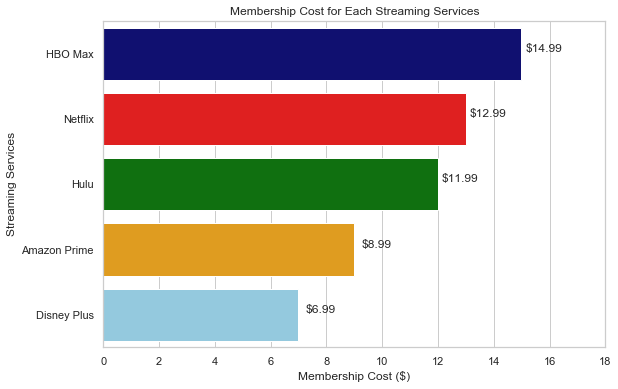

In [13]:
palette = {"Amazon Prime":"orange", "Disney Plus": "skyblue", "HBO Max": "navy", "Hulu": "green", "Netflix":"red"}
ax = sns.barplot(data = membership.sort_values("cost", ascending = False),\
                 x= "cost", y = "web_name", palette = palette)
plt.title("Membership Cost for Each Streaming Services")
plt.xlabel("Membership Cost ($)")
plt.ylabel("Streaming Services")
ax.set_xlim(0,18)
for p in ax.patches:
    ax.annotate("$%.2f" % p.get_width(), xy = (p.get_width()+0.8, p.get_y() + p.get_height() / 2),
                 ha='center', va='center', fontsize=12, xytext=(0, 5), textcoords='offset points')

### Q1. How many contents are in each streaming service?

In [14]:
df_count = pd.DataFrame(df.groupby(["web_name","movie_or_tv"]).size()).\
            reset_index().rename(columns = {0:"count"})
df_count

,web_name,movie_or_tv,count
0,Amazon Prime,Movie,14067
1,Amazon Prime,Show,2136
2,Disney Plus,Movie,637
3,Disney Plus,Show,203
4,HBO Max,Movie,1747
5,HBO Max,Show,368
6,Hulu,Movie,945
7,Hulu,Show,1713
8,Netflix,Movie,3762
9,Netflix,Show,1727


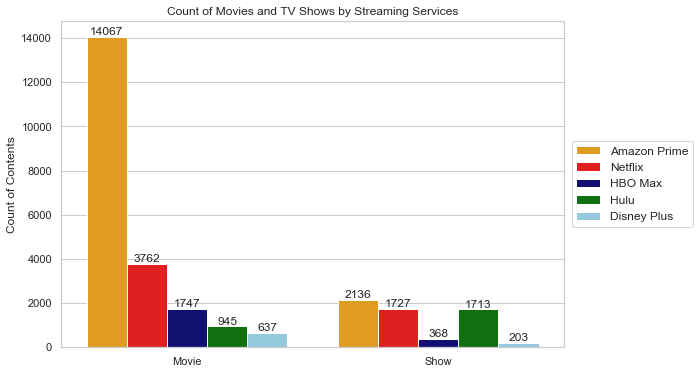

In [15]:
ax = sns.barplot(data =df_count.sort_values("count", ascending = False),\
            x= "movie_or_tv", y = "count", hue = "web_name", palette = palette)
plt.title("Count of Movies and TV Shows by Streaming Services")
plt.xlabel("")
plt.ylabel("Count of Contents")
plt.legend(fontsize = 12, bbox_to_anchor=(1.27,0.65))
for p in ax.patches:
    ax.annotate(int(p.get_height()), xy = (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center', fontsize=12, xytext=(0, 5), textcoords='offset points')

### Q2. How does the distribution of review scores look for each service?

#### With IMDB Score

In [16]:
# Overall average imdb_score of movies and TV shows
df.groupby("movie_or_tv")["imdb_score"].mean()

movie_or_tv
Movie    5.985874
Show     7.143145
Name: imdb_score, dtype: float64

In [17]:
imdb = df.groupby(["web_name","movie_or_tv"])[["imdb_score"]].describe().round(2).iloc[:,1:]
imdb

imdb_score                               
                               mean   std  min  25%  50%  75%  max
web_name     movie_or_tv                                          
Amazon Prime Movie             5.77  1.40  1.0  4.9  5.9  6.8  9.4
             Show              7.14  1.14  1.8  6.6  7.3  8.0  9.5
Disney Plus  Movie             6.49  1.02  1.6  5.9  6.5  7.2  9.0
             Show              6.95  1.14  3.3  6.2  7.0  7.9  9.7
HBO Max      Movie             6.81  1.03  1.7  6.2  7.0  7.6  9.3
             Show              7.49  1.08  2.5  7.1  7.7  8.2  9.4
Hulu         Movie             6.16  1.09  1.6  5.5  6.2  7.0  9.3
             Show              7.06  1.19  1.7  6.6  7.3  7.9  9.4
Netflix      Movie             6.25  1.15  1.6  5.5  6.3  7.1  9.3
             Show              7.16  1.10  1.0  6.6  7.3  7.9  9.5

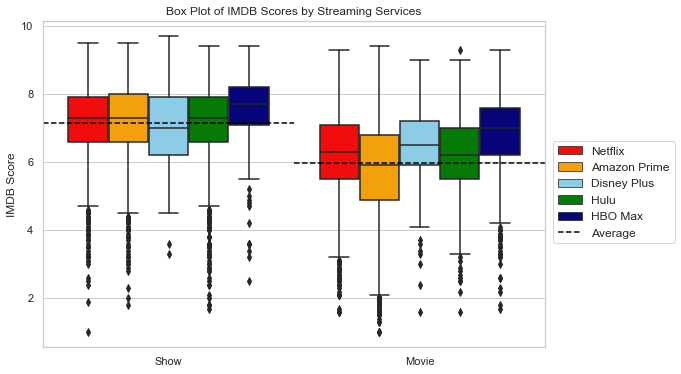

In [18]:
g = sns.boxplot(data = df, x = "movie_or_tv", y = "imdb_score", hue = "web_name", palette = palette, saturation = 0.9)
plt.title("Box Plot of IMDB Scores by Streaming Services")
plt.xlabel("")
plt.ylabel("IMDB Score")
plt.legend(fontsize = 12, bbox_to_anchor=(1,0.65))
g.axhline(5.98, color = "black", linestyle = '--', xmin = 0.5)
g.axhline(7.14, color = "black",linestyle = '--', xmax = 0.5)

# manually define a new patch 
from matplotlib.lines import Line2D
handles, labels = plt.gca().get_legend_handles_labels()
line = Line2D([0],[0],color='black', label='Average', ls = "--")
handles.append(line) 
plt.legend(handles=handles, fontsize = 12, bbox_to_anchor=(1.27,0.65))

#### With Popularity Score from Reelgood.com

The Reelgood Score takes into account audience and critics scores from IMDb and critic sentiment, recent popularity, and other quality markers like genres or cast & crew to help you find what to watch. The higher the score, the better the movie or show.

In [19]:
df.groupby("movie_or_tv")["rg_score"].mean()

movie_or_tv
Movie    46.795371
Show     50.533635
Name: rg_score, dtype: float64

In [20]:
rg_score = df.groupby(["web_name","movie_or_tv"])[["rg_score"]].describe().round(2).iloc[:,1:]
rg_score

rg_score                                      
                             mean    std   min   25%   50%   75%    max
web_name     movie_or_tv                                               
Amazon Prime Movie          41.71  13.92  10.0  33.0  38.0  49.0   97.0
             Show           39.77  20.08  10.0  22.0  41.0  53.0   92.0
Disney Plus  Movie          61.43  16.60  15.0  48.0  60.0  75.0   96.0
             Show           53.74  13.46  10.0  46.0  54.0  62.0   91.0
HBO Max      Movie          61.92  17.74  10.0  49.0  65.0  76.0   97.0
             Show           60.42  17.28  10.0  50.0  63.0  73.0   99.0
Hulu         Movie          59.48  14.75  11.0  48.0  60.0  71.0  100.0
             Show           54.18  18.11  10.0  45.0  56.0  67.0   97.0
Netflix      Movie          52.88  15.09  10.0  42.0  51.0  63.0   98.0
             Show           55.71  16.18  10.0  45.0  55.0  67.0  100.0

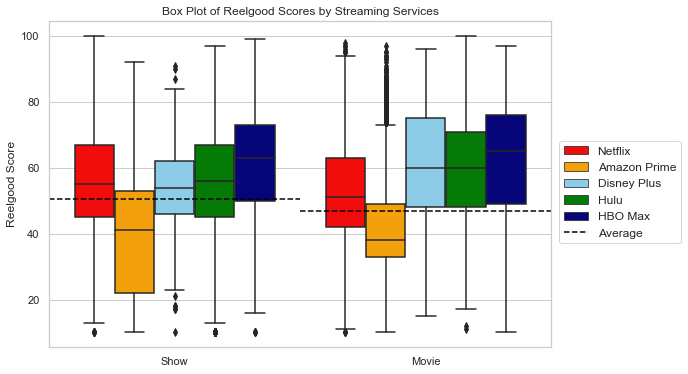

In [21]:
g = sns.boxplot(data = df, x = "movie_or_tv", y = "rg_score", hue = "web_name", palette = palette, saturation = 0.9)
plt.title("Box Plot of Reelgood Scores by Streaming Services")
plt.xlabel("")
plt.ylabel("Reelgood Score")
g.axhline(46.79, color = "black", linestyle = '--', xmin = 0.5)
g.axhline(50.53, color = "black",linestyle = '--', xmax = 0.5)

# manually define a new patch 
handles, labels = plt.gca().get_legend_handles_labels()
line = Line2D([0],[0],color='black', label='Average', ls = "--")
handles.append(line) 
plt.legend(handles=handles, fontsize = 12, bbox_to_anchor=(1.27,0.65))

### Q3. What are the proportions for quality and high-quality movies and TV shows?

In [22]:
# Let's say movies or TV shows with above 50% of the imdb_score are considered quality.
# And, anything above the 75% of the imdb_score is considered high quality.
df.groupby("movie_or_tv")["imdb_score"].describe()

,count,mean,std,min,25%,50%,75%,max
movie_or_tv,,,,,,,,
Movie,20275.0,5.985874,1.345793,1.0,5.2,6.2,7.0,9.4
Show,4967.0,7.143145,1.141777,1.0,6.6,7.3,7.9,9.7


In [23]:
# Make the movies and TV shows into two separate dataframes
groups = df.groupby("movie_or_tv")
df_movie = pd.DataFrame(groups).iloc[0,1]
df_tv = pd.DataFrame(groups).iloc[1,1]

In [24]:
# Total, High Quality and Quality Movies
total_movie = df_movie.groupby("web_name").size()
Q_movie = df_movie.loc[df_movie["imdb_score"] >= 6.2,].groupby("web_name").size()
HQ_movie = df_movie.loc[df_movie["imdb_score"] >= 7.0,].groupby("web_name").size()

# Total, High Quality and Quality TV Shows
total_tv = df_tv.groupby("web_name").size()
Q_tv = df_tv.loc[df_tv["imdb_score"] >= 7.3,].groupby("web_name").size()
HQ_tv = df_tv.loc[df_tv["imdb_score"] >= 7.9,].groupby("web_name").size()

#### Quality Movies

In [25]:
movies = pd.concat([total_movie, Q_movie, HQ_movie], axis = 1,\
                   keys= ["Total Movies","Quality Movies","High Quality Movies"])
movies = pd.DataFrame(movies.stack()).reset_index().rename(columns = {'level_1':"quality", 0:"count"})
movies

,web_name,quality,count
0,Amazon Prime,Total Movies,14067
1,Amazon Prime,Quality Movies,5912
2,Amazon Prime,High Quality Movies,2847
3,Disney Plus,Total Movies,637
4,Disney Plus,Quality Movies,417
5,Disney Plus,High Quality Movies,217
6,HBO Max,Total Movies,1747
7,HBO Max,Quality Movies,1299
8,HBO Max,High Quality Movies,850
9,Hulu,Total Movies,945


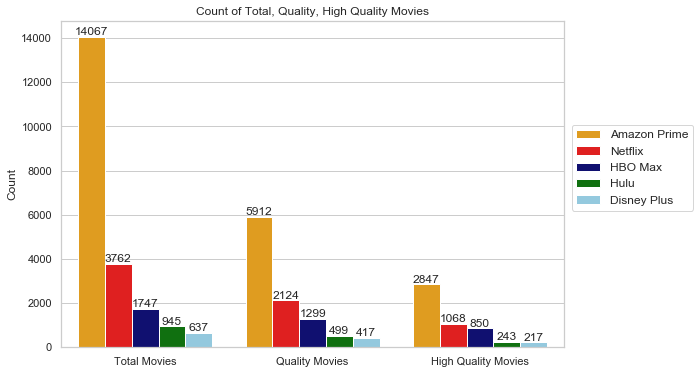

In [26]:
ax = sns.barplot(data = movies.sort_values("count", ascending = False),\
                 x = "quality", y = "count", hue = "web_name", palette = palette)
plt.title("Count of Total, Quality, High Quality Movies")
plt.xlabel("")
plt.ylabel("Count")
plt.legend(fontsize= 12, bbox_to_anchor=(1.27,0.7))
for p in ax.patches:
    ax.annotate(int(p.get_height()), xy = (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center', fontsize=12, xytext=(0, 5), textcoords='offset points')

#### Quality TV Shows

In [27]:
tvshows = pd.concat([total_tv, Q_tv, HQ_tv], axis = 1,\
                    keys= ["Total TV Shows","Quality TV Shows","High Quality TV Shows"])
tvshows = pd.DataFrame(tvshows.stack()).reset_index().rename(columns = {'level_1':"quality", 0:"count"})
tvshows

,web_name,quality,count
0,Amazon Prime,Total TV Shows,2136
1,Amazon Prime,Quality TV Shows,712
2,Amazon Prime,High Quality TV Shows,380
3,Disney Plus,Total TV Shows,203
4,Disney Plus,Quality TV Shows,78
5,Disney Plus,High Quality TV Shows,51
6,HBO Max,Total TV Shows,368
7,HBO Max,Quality TV Shows,236
8,HBO Max,High Quality TV Shows,157
9,Hulu,Total TV Shows,1713


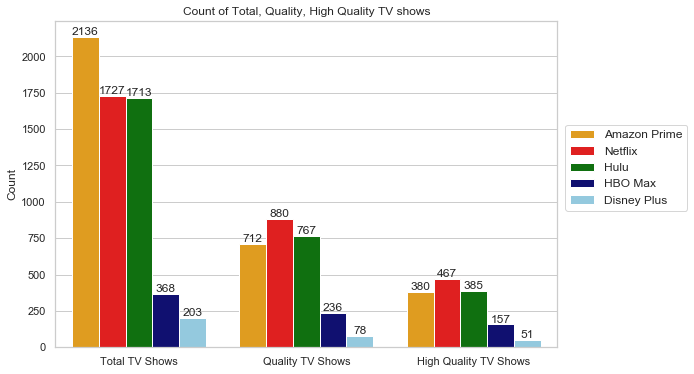

In [28]:
ax = sns.barplot(data = tvshows.sort_values("count", ascending = False),\
                 x = "quality", y = "count", hue = "web_name", palette = palette)
plt.title("Count of Total, Quality, High Quality TV shows")
plt.xlabel("")
plt.ylabel("Count")
plt.legend(fontsize= 12, bbox_to_anchor=(1.27,0.7))
for p in ax.patches:
    ax.annotate(int(p.get_height()), xy = (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center', fontsize=12, xytext=(0, 5), textcoords='offset points')

### Breakdown of HQ movies and TV shows by year

In [29]:
year_movie = df_movie.loc[df_movie['imdb_score'] >= 7.0,]
year_movie = pd.DataFrame(year_movie.groupby(["web_name", "year_start"]).size()).\
                reset_index().rename(columns = {0:"count"})
year_tv = df_tv.loc[df_tv['imdb_score'] >= 7.9,]
year_tv = pd.DataFrame(year_tv.groupby(["web_name", "year_start"]).size()).\
                reset_index().rename(columns = {0:"count"})

#### Count of HQ movies by year

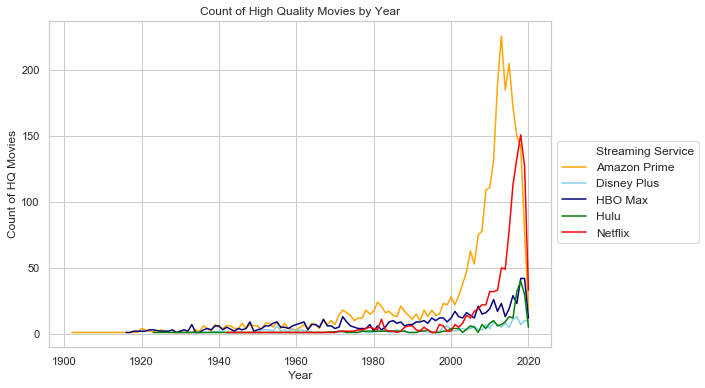

In [30]:
ax = sns.lineplot(data= year_movie, x = "year_start", y = "count", hue = "web_name", palette = palette)
plt.title("Count of High Quality Movies by Year")
plt.xlabel("Year")
plt.ylabel("Count of HQ Movies")
ax.legend(fontsize= 12, bbox_to_anchor=(1,0.65)).texts[0].set_text("Streaming Service")

#### Count of HQ TV series by year

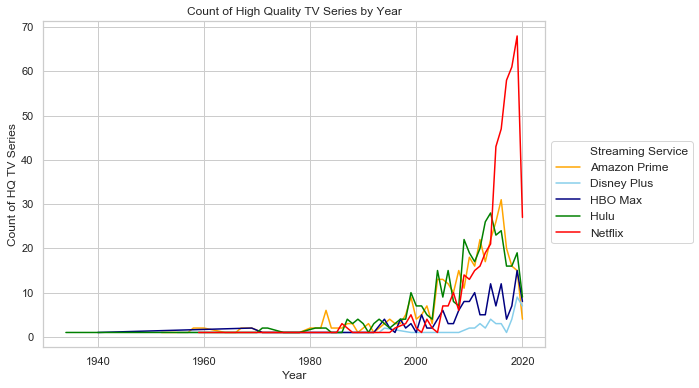

In [31]:
sns.lineplot(data= year_tv, x = "year_start", y = "count",  hue = "web_name", palette = palette)
plt.title("Count of High Quality TV Series by Year")
plt.xlabel("Year")
plt.ylabel("Count of HQ TV Series")
plt.legend(fontsize= 12, bbox_to_anchor=(1,0.65)).texts[0].set_text("Streaming Service")

### Q4. What genres are popular?

In [32]:
df_genre = df.copy()

In [33]:
index=0
# save [index, genre] in a nested list
list_ = []
for item in df_genre.genres:
    list_.extend(map(lambda x: [index, x], item))
    index += 1
genre = pd.DataFrame(list_, columns=['index', 'genres'])
genre['genres'] = genre['genres'].apply(lambda x: x.strip("'"))

In [34]:
df_genre = pd.merge(df_genre.drop('genres', axis=1), genre, how='right', left_index=True, right_on='index')
df_genre = df_genre.loc[df_genre["genres"] != "Nan",]
print(df_genre.shape)

(70607, 11)


#### Preliminary analysis of genres

Text(0, 0.5, 'Count')

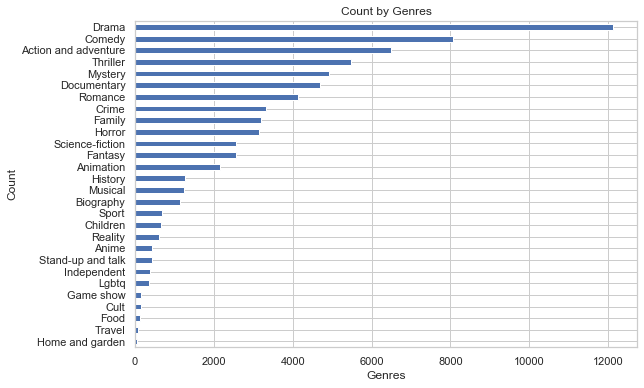

In [35]:
df_genre.groupby('genres').size().sort_values().plot.barh()
plt.title("Count by Genres")
plt.xlabel('Genres')
plt.ylabel('Count')

Text(0, 0.5, 'Averge Imdb Score')

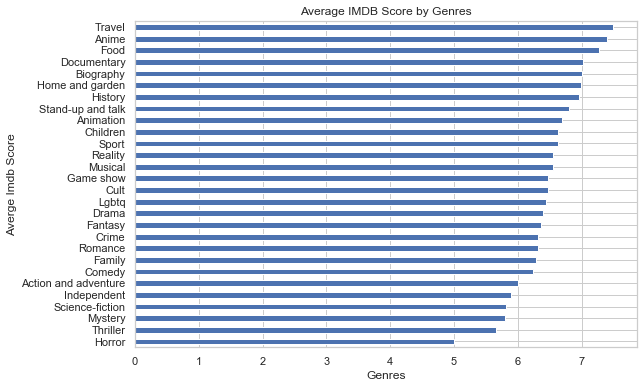

In [36]:
df_genre.groupby('genres')['imdb_score'].mean().sort_values().plot.barh()
plt.title("Average IMDB Score by Genres")
plt.xlabel("Genres")
plt.ylabel('Averge Imdb Score')

### Breakdown of high quality movies and TV shows (in 2000s) by genre

In [37]:
genre_groups = df_genre.groupby("movie_or_tv")
genre_movie = pd.DataFrame(genre_groups).iloc[0,1]
genre_movie = genre_movie.loc[(genre_movie['imdb_score'] >= 7.0) & (genre_movie["year_start"] >= 2000),]
genre_tv = pd.DataFrame(genre_groups).iloc[1,1]
genre_tv = genre_tv.loc[(genre_tv['imdb_score'] >= 7.9) & (genre_tv["year_start"] >= 2000),]
facet_movie = pd.DataFrame(genre_movie.groupby(["web_name", "genres"]).size().round(2)).\
                reset_index().rename(columns = {0:"count"})
facet_tv = pd.DataFrame(genre_tv.groupby(["web_name", "genres"]).size().round(2)).\
                reset_index().rename(columns = {0:"count"})

#### Count of HQ movies by genre

/Users/hb/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


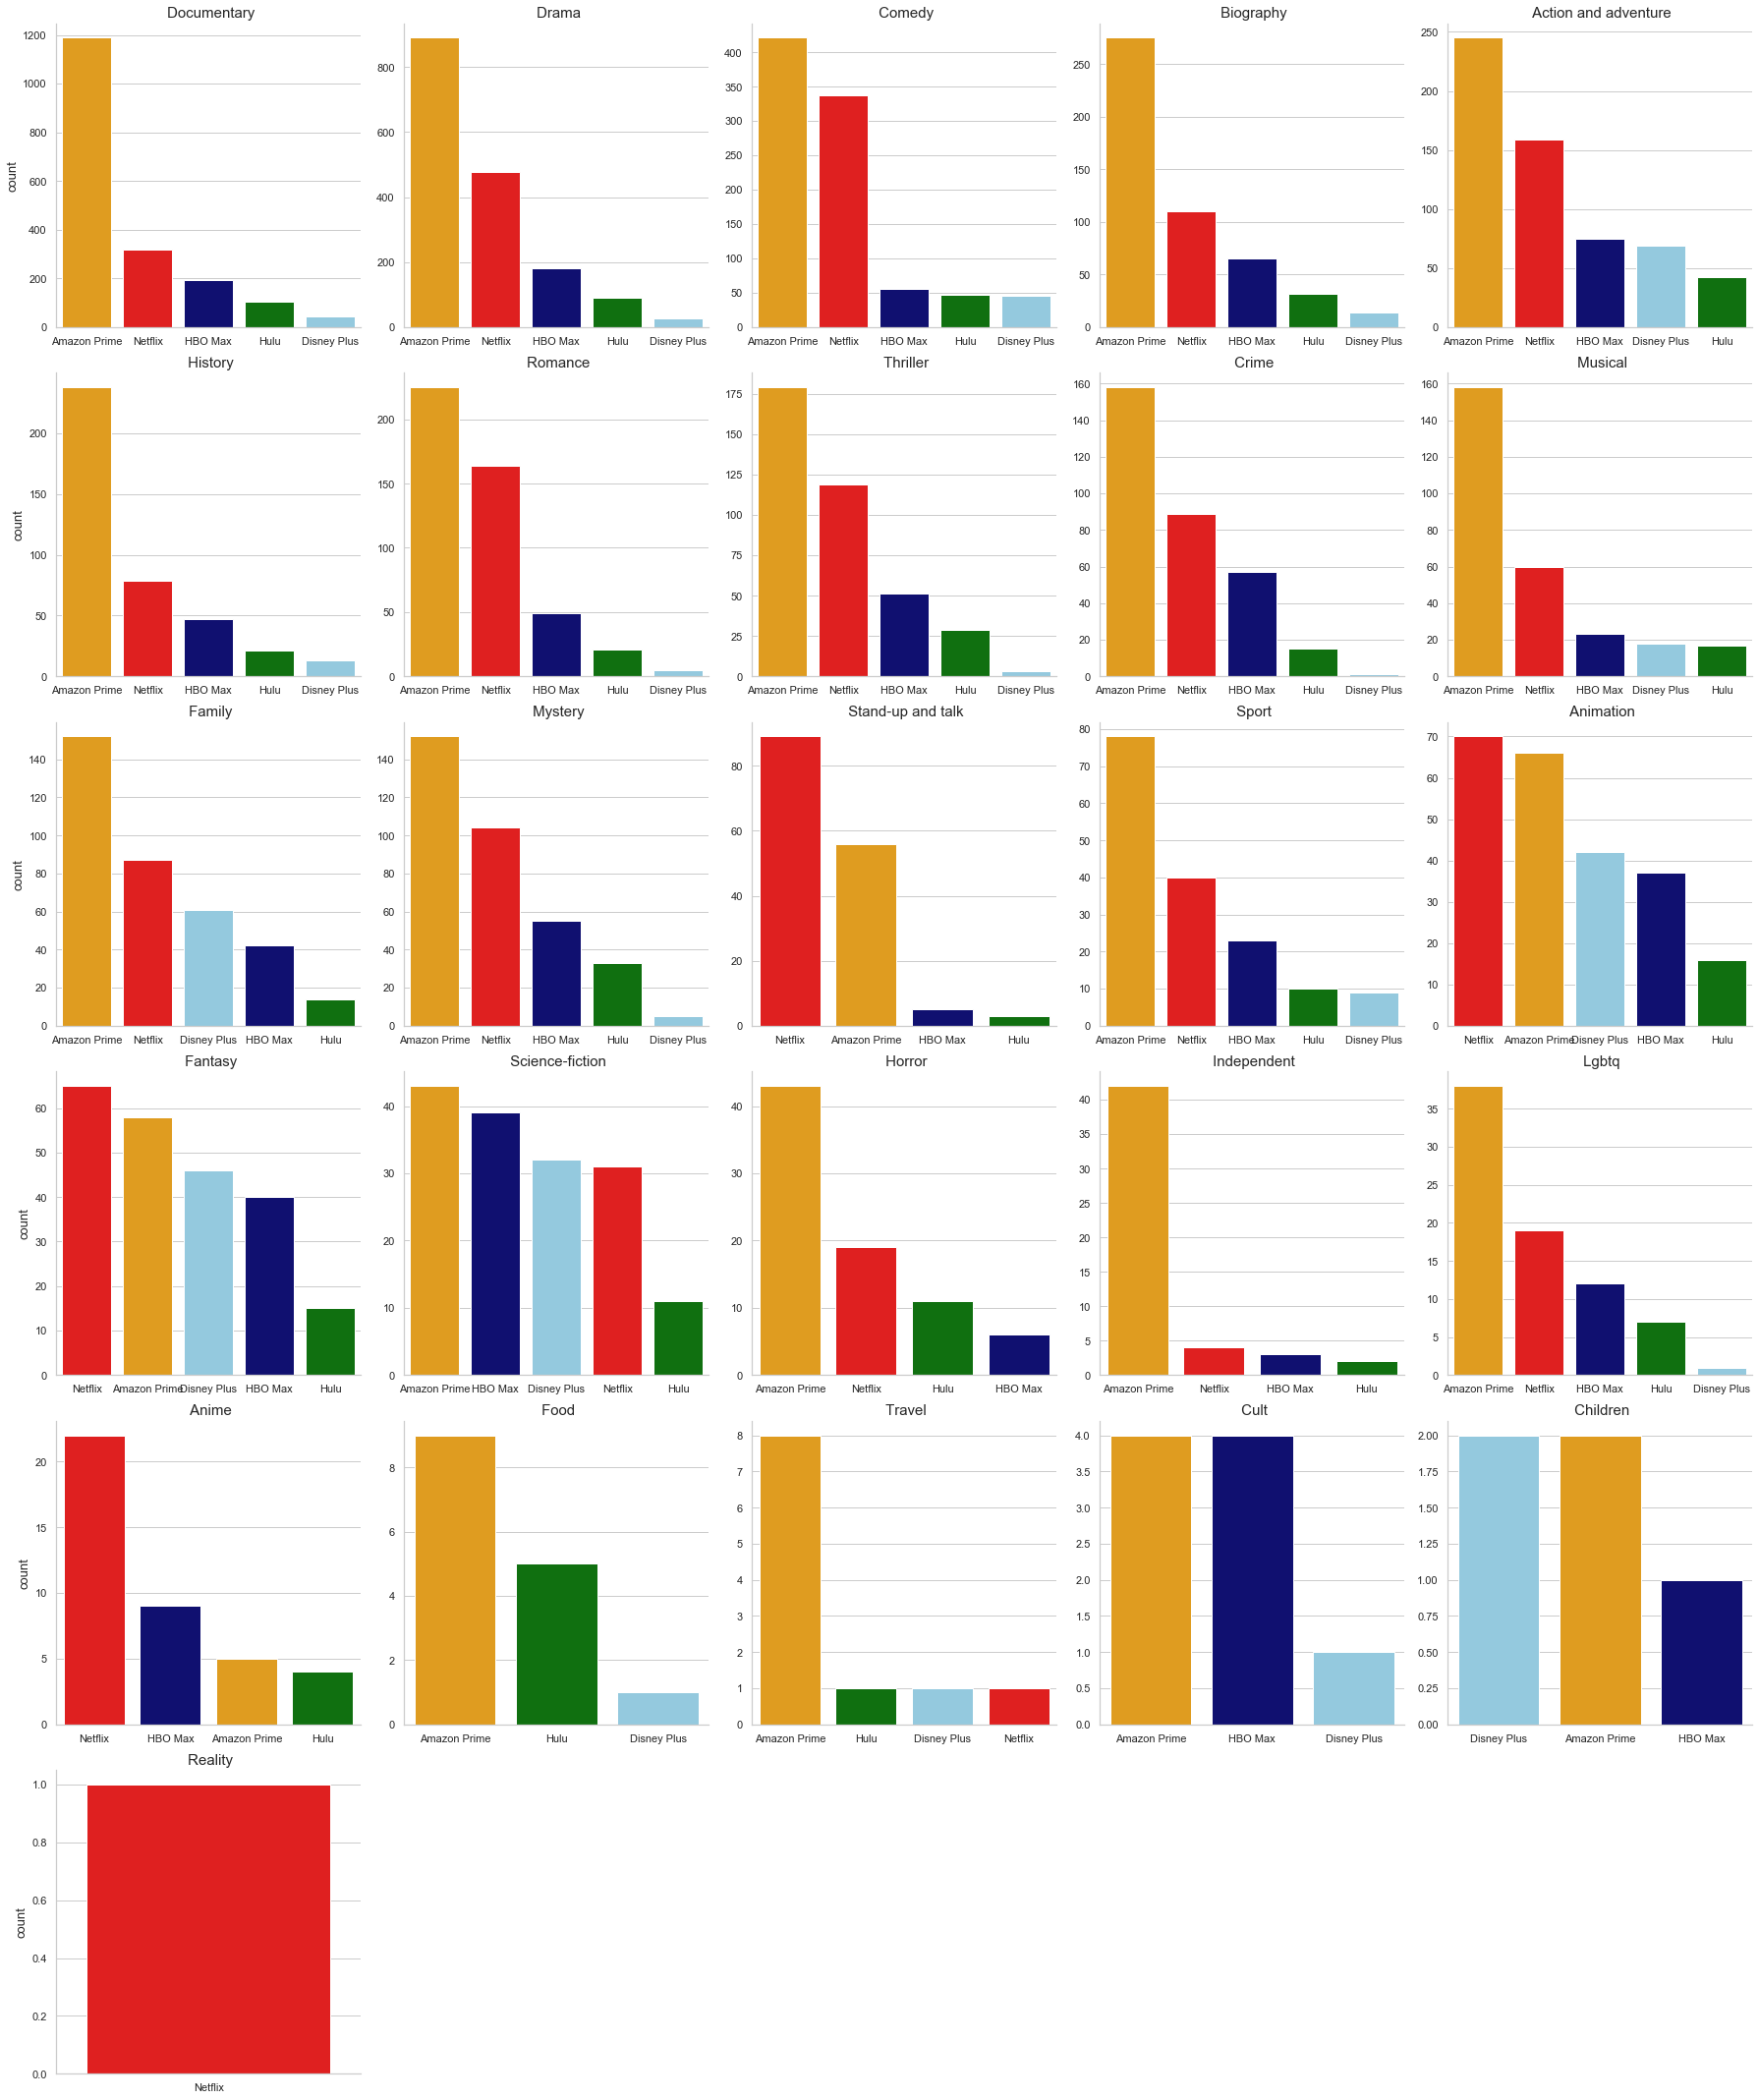

In [38]:
grid = sns.FacetGrid(data = facet_movie.sort_values(by = "count", ascending = False),\
                     col = "genres", col_wrap = 5,sharex = False, sharey = False, height = 5)
grid.map(sns.barplot, "web_name", "count", palette = palette)

for ax in grid.axes.flat:
    # Make y-axis labels slightly larger
    ax.set_xlabel(xlabel = "")
    ax.set_ylabel(ax.get_ylabel(), fontsize= 13)
    # Make title more human-readable and larger
    ax.set_title(ax.get_title().split('=')[1], fontsize=15)
# grid.savefig("moviegenre.png")

#### Count of HQ TV shows by genre

/Users/hb/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


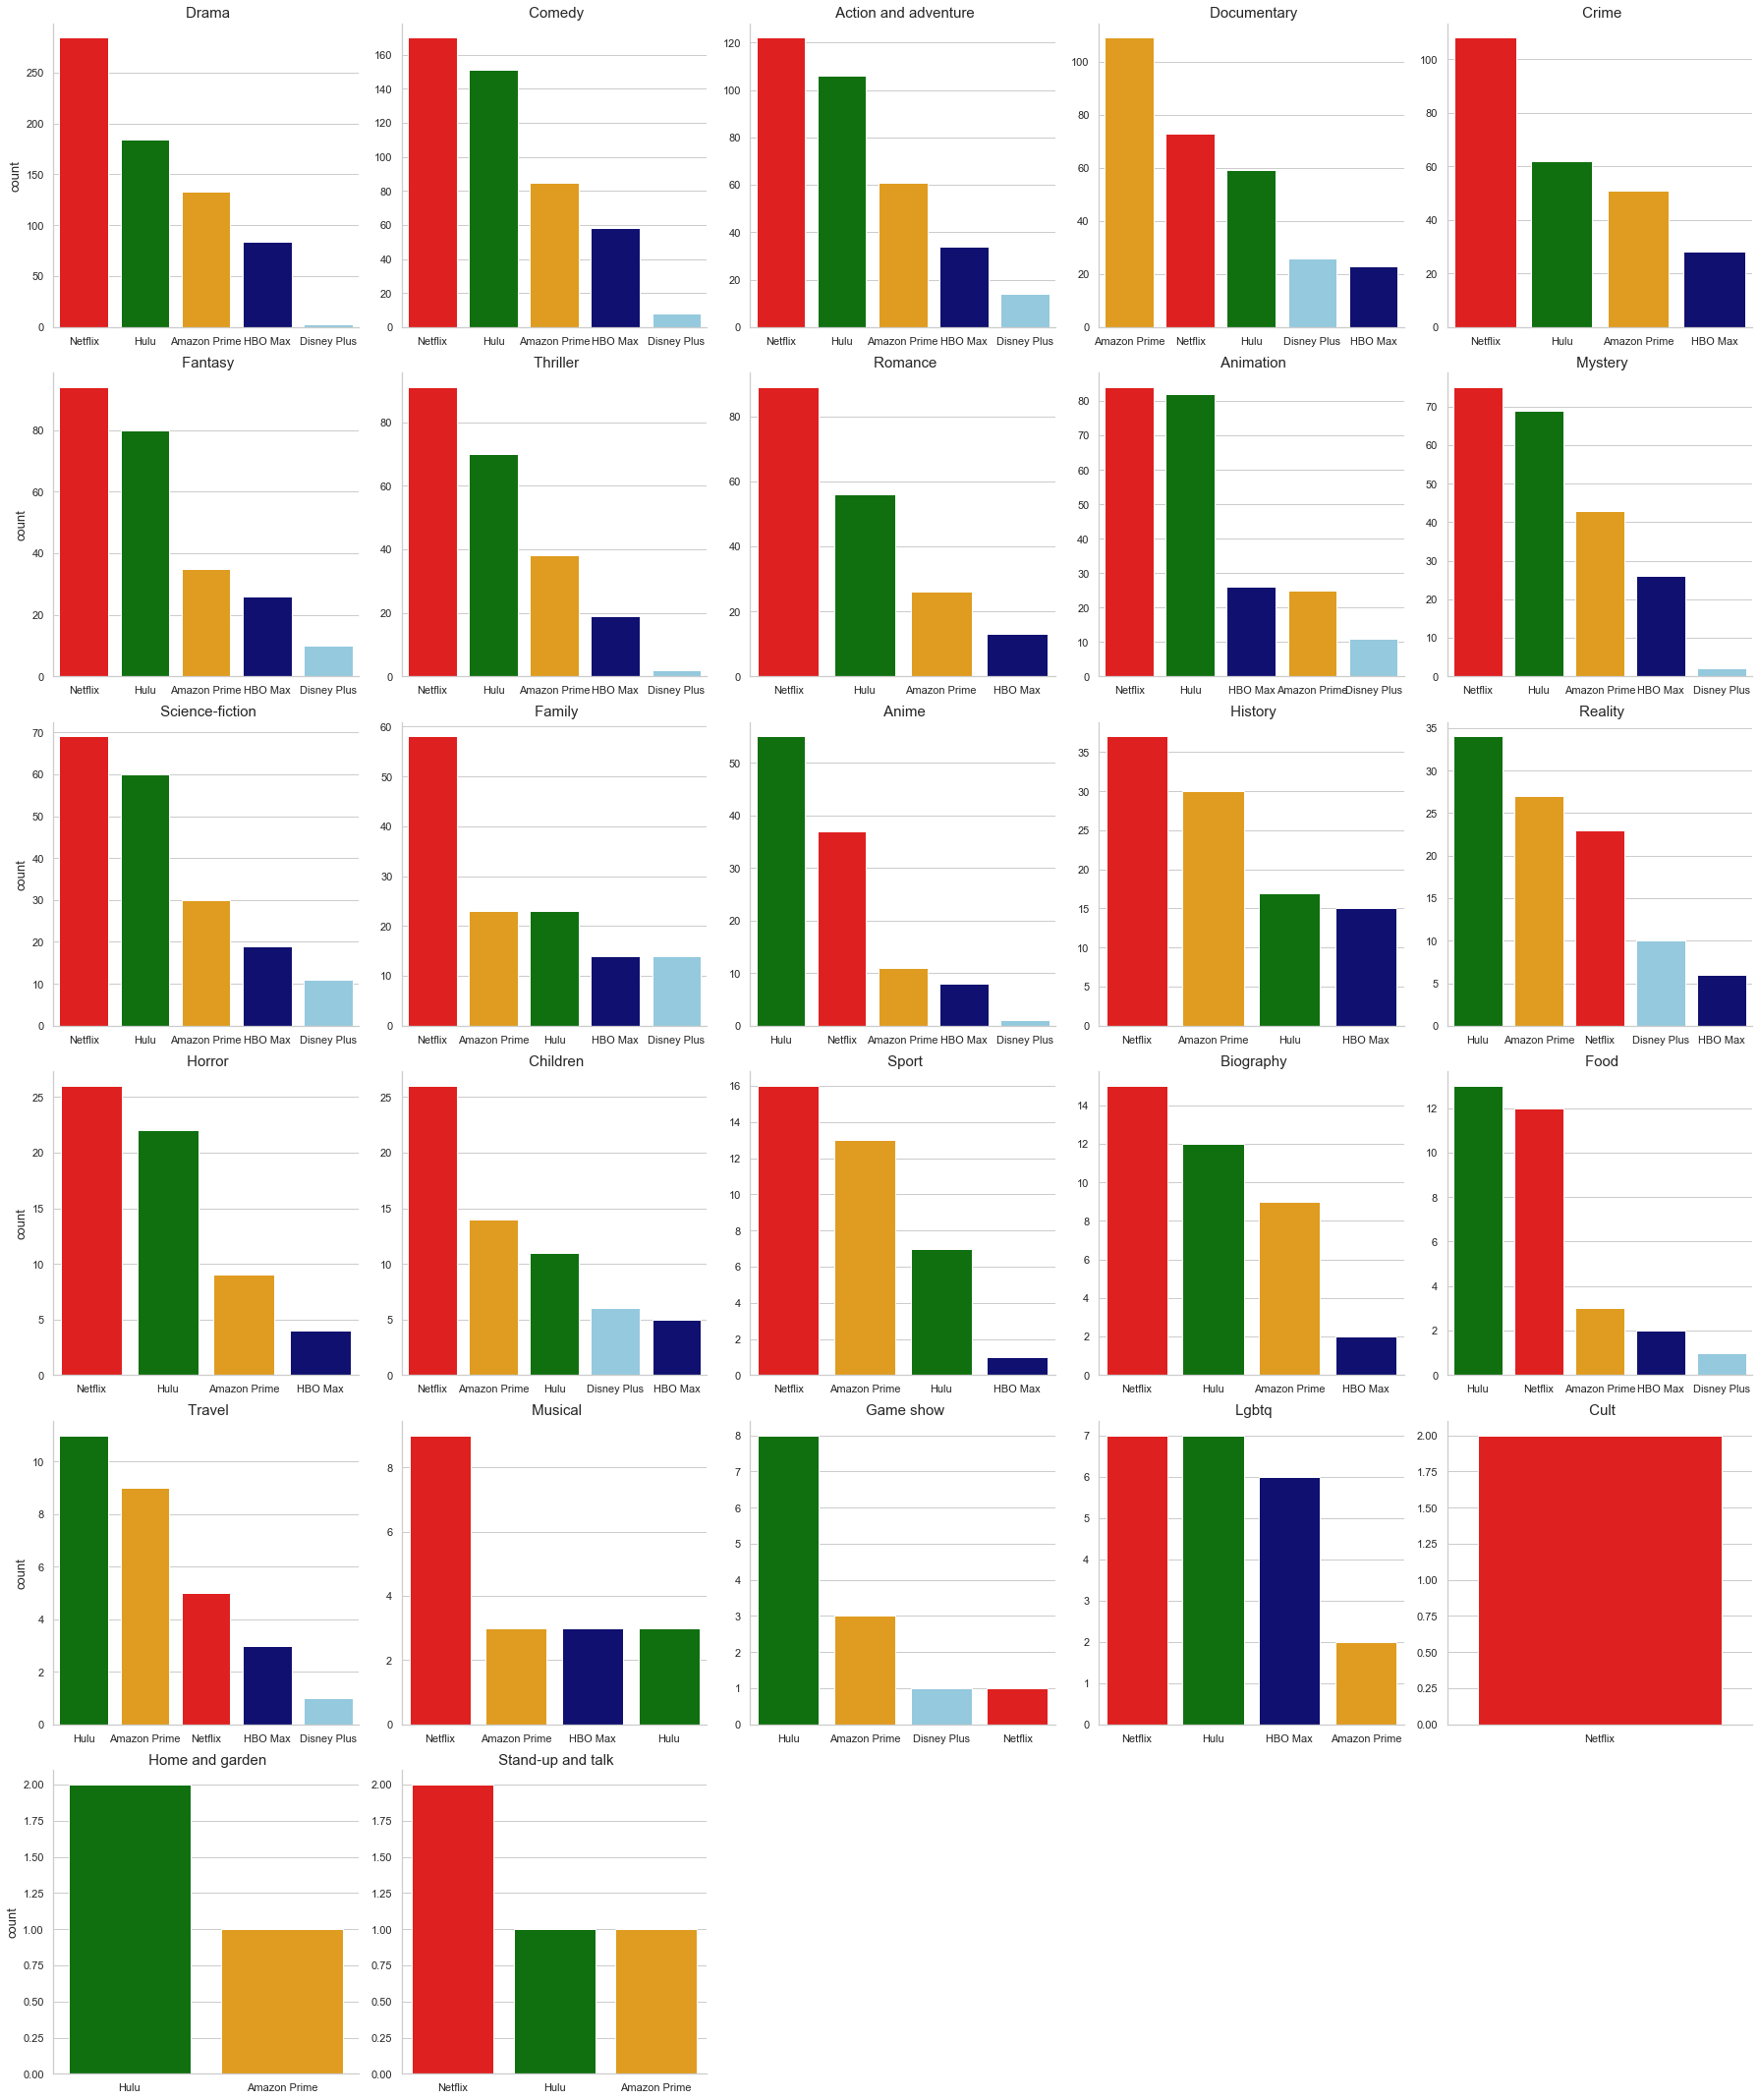

In [39]:
grid = sns.FacetGrid(data = facet_tv.sort_values(by = "count", ascending = False),\
                     col = "genres", col_wrap = 5, sharex = False, sharey = False, height = 5)
grid.map(sns.barplot, "web_name", "count", palette = palette)

for ax in grid.axes.flat:
    # Make y-axis labels slightly larger
    ax.set_xlabel(xlabel = "")
    ax.set_ylabel(ax.get_ylabel(), fontsize= 13)
    # Make title more human-readable and larger
    ax.set_title(ax.get_title().split('=')[1], fontsize=15)
# grid.savefig("tvgenre.png")

### Q5. How many contents do you get for one dollar?

In [40]:
HQ_movie2000 = df_movie.loc[(df_movie["imdb_score"] >= 7.0) &\
                            (df_movie["year_start"] >= 2000),].groupby("web_name").size()
HQ_tv2000 = df_tv.loc[(df_tv["imdb_score"] >= 7.9) & (df_tv["year_start"] >= 2000),].groupby("web_name").size()
HQ2000 =pd.concat([HQ_movie2000,HQ_tv2000], axis = 1, keys = ["HQ Movies","HQ TV Shows"])
HQ2000 = pd.DataFrame(HQ2000.stack()).reset_index().rename(columns = {'level_1':"kind", 0:"count"})

In [41]:
count_cost = HQ2000.merge(membership)
count_cost['perdollar'] = round(count_cost['count'] / count_cost['cost']).astype("int")
tree_movie = count_cost.loc[count_cost['kind']=='HQ Movies',]
tree_tv = count_cost.loc[count_cost['kind']=='HQ TV Shows',]
count_cost

,web_name,kind,count,cost,perdollar
0,Amazon Prime,HQ Movies,2151,8.99,239
1,Amazon Prime,HQ TV Shows,300,8.99,33
2,Disney Plus,HQ Movies,127,6.99,18
3,Disney Plus,HQ TV Shows,43,6.99,6
4,HBO Max,HQ Movies,413,14.99,28
5,HBO Max,HQ TV Shows,133,14.99,9
6,Hulu,HQ Movies,204,11.99,17
7,Hulu,HQ TV Shows,316,11.99,26
8,Netflix,HQ Movies,959,12.99,74
9,Netflix,HQ TV Shows,442,12.99,34


(0.0, 100.0, 0.0, 100.0)

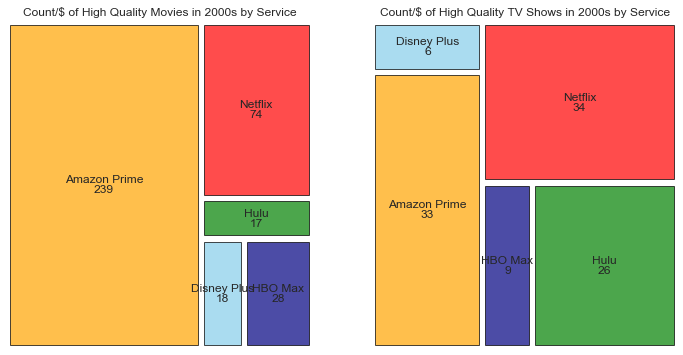

In [42]:
import squarify
colors = ["orange","skyblue","navy","green","red"]
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
squarify.plot(sizes=tree_movie["perdollar"], value = tree_movie["perdollar"],\
              label=tree_tv["web_name"], color = colors,\
              alpha = 0.7, pad = True, ax=axes[0], edgecolor = "black")
axes[0].set_title("Count/$ of High Quality Movies in 2000s by Service")
axes[0].axis('off')

squarify.plot(sizes=tree_tv["perdollar"], value = tree_tv["perdollar"],\
              label=tree_tv["web_name"], color = colors,\
              alpha = 0.7, pad = True, ax=axes[1], edgecolor = "black")
axes[1].set_title("Count/$ of High Quality TV Shows in 2000s by Service")
axes[1].axis('off')

# 3. Key Findings and Insights

* In general, Amazon Prime has the most high-quality movies, followed by Netflix and HBO Max.
* Specifically, Amazon Prime is well-known for documentary, biography, history, and independent movie genres.
* Yet, Netflix is the leading service with stand-up and talk, fantasy, animation, and anime movies. 
* HBO Max is popular for its science-fiction movies.
<br><br>
* Netflix has the most high-quality TV series, followed by Hulu, and Amazon Prime.
* Netflix is especially well-rated with its crime and family TV series.
* Hulu has a focus on its TV series and is popular for its reality and anime TV series.
<br><br>
* For those who care about cost and benefit:
    * If you are into movies, you should subscribe to Amazon Prime.
    * TV series lovers should subscribe to Netflix. But there is a tight match among Netflix, Hulu, and Amazon Prime for TV series. Therefore, further checking the count of contents by genres is recommended.
